# 言語処理100本ノック 2020 (Rev 2)


## 第5章: 係り受け解析

In [8]:
# exec in bash
# cabocha -f1 ai.ja.txt >ai.ja.txt.parsed


### 40. 係り受け解析結果の読み込み（形態素）

In [9]:
# https://qiita.com/kazasiki/items/99505a5005aebe2efb7a
# https://taku910.github.io/cabocha/
# *行の出力形式
# 文節番号（0から始まる整数）
# 係り先の文節番号
# 文節に含まれる形態素の役割（という言い方でいいのか？？）。
#    例えば、0/1 の場合、主辞が 0 番目の形態素 、機能語が 一番目の形態素 と読むらしい
# 係り受けスコア。
#    大きな値ほど係りやすい　らしい
# 形態素解析
#   表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

import re

class Morph():
  def __init__(self, surface, base, pos, pos1):
    self.surface = surface
    self.base = base
    self.pos = pos
    self.pos1 = pos1
  def __str__(self):
    return '"{}","{}","{}","{}"'.format(self.surface, self.base, self.pos, self.pos1)
  def __repr__(self):
    return str(self)

morphs = []
with open('ai.ja.txt.parsed') as f:
  for i, line in enumerate(f):
    if re.search(r"^EOS$",line):
      continue
    if re.search(r"^$",line):
      continue
    if re.search(r"^\*",line):
      # *行
      pass
    else:
      s = line.split('\t')
      if re.search(r"^$",s[0]):
        continue
      t = s[1].split(',')
      morphs.append(Morph(s[0], t[6], t[0], t[1]))

morphs

["人工","人工","名詞","一般",
 "知能","知能","名詞","一般",
 "人工","人工","名詞","一般",
 "知能","知能","名詞","一般",
 "（","（","記号","括弧開",
 "じん","じん","名詞","一般",
 "こうち","こうち","名詞","一般",
 "のう","のう","助詞","終助詞",
 "、","、","記号","読点",
 "、","、","記号","読点",
 "AI","*
 ","名詞","一般",
 "〈","〈","記号","括弧開",
 "エーアイ","*
 ","名詞","固有名詞",
 "〉","〉","記号","括弧閉",
 "）","）","記号","括弧閉",
 "と","と","助詞","格助詞",
 "は","は","助詞","係助詞",
 "、","、","記号","読点",
 "「","「","記号","括弧開",
 "『","『","記号","括弧開",
 "計算","計算","名詞","サ変接続",
 "（","（","記号","括弧開",
 "）","）","記号","括弧閉",
 "』","』","記号","括弧閉",
 "という","という","助詞","格助詞",
 "概念","概念","名詞","一般",
 "と","と","助詞","並立助詞",
 "『","『","記号","括弧開",
 "コンピュータ","コンピュータ","名詞","一般",
 "（","（","記号","括弧開",
 "）","）","記号","括弧閉",
 "』","』","記号","括弧閉",
 "という","という","助詞","格助詞",
 "道具","道具","名詞","一般",
 "を","を","助詞","格助詞",
 "用い","用いる","動詞","自立",
 "て","て","助詞","接続助詞",
 "『","『","記号","括弧開",
 "知能","知能","名詞","一般",
 "』","』","記号","括弧閉",
 "を","を","助詞","格助詞",
 "研究","研究","名詞","サ変接続",
 "する","する","動詞","自立",
 "計算","計算","名詞","サ変接続",
 "機","機","名詞","接尾",
 "科学","


### 41. 係り受け解析結果の読み込み（文節・係り受け）

In [10]:

# https://qiita.com/kazasiki/items/99505a5005aebe2efb7a
# https://taku910.github.io/cabocha/
# *行の出力形式
# 文節番号（0から始まる整数）
# 係り先の文節番号
# 文節に含まれる形態素の役割（という言い方でいいのか？？）。
#    例えば、0/1 の場合、主辞が 0 番目の形態素 、機能語が 一番目の形態素 と読むらしい
# 係り受けスコア。
#    大きな値ほど係りやすい　らしい
# 形態素解析
#   表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

import re

class Morph():
  def __init__(self, surface, base, pos, pos1):
    self.surface = surface
    self.base = base
    self.pos = pos
    self.pos1 = pos1
  def __str__(self):
    return self.surface
  def __repr__(self):
    return '<{},{},{},{}>'.format(self.surface, self.base, self.pos, self.pos1)
#    return str(self)

class Chunk():
  def __init__(self, morphs, dst, srcs):
#    self.id = id
    self.morphs = morphs
    self.dst = dst
    self.srcs = srcs
  def __str__(self):
#    return '{}, {},{},{}'.format(self.id, self.morphs, self.dst, self.srcs)
    return '{},{},{}'.format(self.morphs, self.dst, self.srcs)
  def __repr__(self):
    return str(self)



statements = []
chunks = []
c = None
with open('ai.ja.txt.parsed') as f:
  for line in f:
    if re.search(r"^EOS$",line):
      if len(chunks) > 0:
        # 係り元文節INDEXのリスト作成
        for i, ch in enumerate(chunks):
          if ch.dst < 0:
            continue
          chunks[ch.dst].srcs.append(i)
        statements.append(chunks)
      c = None
      chunks = []
      continue
    if re.search(r"^$",line):
      continue
    if re.search(r"^\*",line):
      # 係り受け
      s = line.split(' ')
      c = Chunk([], int(s[2].replace("D","")), [])
      chunks.append(c)
    else:
      # 形態素
      s = line.split('\t')
      if re.search(r"^$",s[0]):
        continue
      t = s[1].split(',')
      c.morphs.append(Morph(s[0], t[6].strip(), t[0], t[1]))

statements

[[[<人工,人工,名詞,一般>, <知能,知能,名詞,一般>],-1,[]],
 [[<人工,人工,名詞,一般>, <知能,知能,名詞,一般>],17,[],
  [<（,（,記号,括弧開>, <じん,じん,名詞,一般>, <こうち,こうち,名詞,一般>, <のう,のう,助詞,終助詞>, <、,、,記号,読点>, <、,、,記号,読点>],17,[],
  [<AI,*,名詞,一般>],3,[],
  [<〈,〈,記号,括弧開>, <エーアイ,*,名詞,固有名詞>, <〉,〉,記号,括弧閉>, <）,）,記号,括弧閉>, <と,と,助詞,格助詞>, <は,は,助詞,係助詞>, <、,、,記号,読点>],17,[2],
  [<「,「,記号,括弧開>, <『,『,記号,括弧開>, <計算,計算,名詞,サ変接続>],5,[],
  [<（,（,記号,括弧開>, <）,）,記号,括弧閉>, <』,』,記号,括弧閉>, <という,という,助詞,格助詞>],9,[4],
  [<概念,概念,名詞,一般>, <と,と,助詞,並立助詞>],9,[],
  [<『,『,記号,括弧開>, <コンピュータ,コンピュータ,名詞,一般>],8,[],
  [<（,（,記号,括弧開>, <）,）,記号,括弧閉>, <』,』,記号,括弧閉>, <という,という,助詞,格助詞>],9,[7],
  [<道具,道具,名詞,一般>, <を,を,助詞,格助詞>],10,[5, 6, 8],
  [<用い,用いる,動詞,自立>, <て,て,助詞,接続助詞>],12,[9],
  [<『,『,記号,括弧開>, <知能,知能,名詞,一般>, <』,』,記号,括弧閉>, <を,を,助詞,格助詞>],12,[],
  [<研究,研究,名詞,サ変接続>, <する,する,動詞,自立>],13,[10, 11],
  [<計算,計算,名詞,サ変接続>, <機,機,名詞,接尾>, <科学,科学,名詞,一般>],14,[12],
  [<（,（,記号,括弧開>, <）,）,記号,括弧閉>, <の,の,助詞,連体化>],15,[13],
  [<一,一,名詞,数>, <分野,分野,名詞,一般>, <」,」,記号,括弧閉>, <を,を,助詞,格助詞>],16,[14],
  [<指す,指す,動詞,自立>],17,[15],


### 42. 係り元と係り先の文節の表示

In [11]:
def surface(chunk):
  return "".join([ m.surface for m in chunk.morphs if m.pos != "記号"])

for i,s in enumerate(statements):
  for j,c in enumerate(s):
#    surf = "".join([ m.surface for m in c.morphs if m.pos != "記号"])
    surf = surface(c)
    dst_surf = surface(s[c.dst]) if c.dst > -1 else ""
    print(i,j,c.dst,"{}\t{}".format(surf, dst_surf))

0 0 -1 人工知能	
1 0 17 人工知能	語
1 1 17 じんこうちのう	語
1 2 3 AI	エーアイとは
1 3 17 エーアイとは	語
1 4 5 計算	という
1 5 9 という	道具を
1 6 9 概念と	道具を
1 7 8 コンピュータ	という
1 8 9 という	道具を
1 9 10 道具を	用いて
1 10 12 用いて	研究する
1 11 12 知能を	研究する
1 12 13 研究する	計算機科学
1 13 14 計算機科学	の
1 14 15 の	一分野を
1 15 16 一分野を	指す
1 16 17 指す	語
1 17 34 語	研究分野とも
1 18 20 言語の	推論
1 19 20 理解や	推論
1 20 21 推論	問題解決などの
1 21 22 問題解決などの	知的行動を
1 22 24 知的行動を	代わって
1 23 24 人間に	代わって
1 24 26 代わって	行わせる
1 25 26 コンピューターに	行わせる
1 26 27 行わせる	技術または
1 27 34 技術または	研究分野とも
1 28 29 計算機	コンピュータによる
1 29 31 コンピュータによる	情報処理システムの
1 30 31 知的な	情報処理システムの
1 31 33 情報処理システムの	実現に関する
1 32 33 設計や	実現に関する
1 33 34 実現に関する	研究分野とも
1 34 35 研究分野とも	される
1 35 -1 される	
2 0 1 日本大百科全書(ニッポニカ)』の	解説で
2 1 5 解説で	述べている
2 2 3 情報工学者通信工学者の	佐藤理史は
2 3 5 佐藤理史は	述べている
2 4 5 次のように	述べている
2 5 -1 述べている	
3 0 1 人間の	知的能力を
3 1 3 知的能力を	実現する
3 2 3 コンピュータ上で	実現する
3 3 5 実現する	技術ソフトウェアコンピュータシステム
3 4 5 様々な	技術ソフトウェアコンピュータシステム
3 5 19 技術ソフトウェアコンピュータシステム	ある
3 6 19 応用例は	ある
3 7 8 自然言語処理	機械翻訳かな漢字変換構文解析等
3 8 9 機械翻訳かな漢字変換構文解析等	専門家の
3 9 10 専門家の	推論判断を
3 1


### 43. 名詞を含む文節が動詞を含む文節に係るものを抽出

In [12]:
def surface(chunk):
  return "".join([ m.surface for m in chunk.morphs if m.pos != "記号"])

for i,s in enumerate(statements):
  for j,c in enumerate(s):
    dst_c = s[c.dst]
    if "名詞" in [ m.pos for m in c.morphs ]:
      if "動詞" in [ m.pos for m in dst_c.morphs ]:
        surf = surface(c)
        dst_surf = surface(s[c.dst]) if c.dst > -1 else ""
        print(i,j,c.dst,"{}\t{}".format(surf, dst_surf))


1 9 10 道具を	用いて
1 11 12 知能を	研究する
1 15 16 一分野を	指す
1 22 24 知的行動を	代わって
1 23 24 人間に	代わって
1 25 26 コンピューターに	行わせる
1 34 35 研究分野とも	される
2 1 5 解説で	述べている
2 3 5 佐藤理史は	述べている
2 4 5 次のように	述べている
3 1 3 知的能力を	実現する
3 2 3 コンピュータ上で	実現する
3 5 19 技術ソフトウェアコンピュータシステム	ある
3 6 19 応用例は	ある
3 10 11 推論判断を	模倣する
3 13 14 画像データを	解析して
3 14 17 解析して	検出抽出したりする
3 16 17 パターンを	検出抽出したりする
3 18 19 画像認識等が	ある
3 20 23 1956年に	命名された
3 21 23 ダートマス会議で	命名された
3 22 23 ジョンマッカーシーにより	命名された
3 23 35 命名された	使われている
3 24 35 現在では	使われている
3 25 26 記号処理を	用いた
3 28 30 記述を	する
3 29 30 主体と	する
3 34 35 意味あいでも	使われている
3 39 41 思考ルーチンも	呼ばれる
3 42 43 ことも	ある
4 2 3 カウンセラーを	模倣した
4 4 8 プログラム	出されるが
4 5 8 人工無脳が	出されるが
4 7 8 引き合いに	出されるが
4 9 13 計算機に	させようという
4 12 13 役割を	させようという
4 14 15 エキスパートシステムと	呼ばれる
4 17 27 実現は	困難視されている
4 18 20 人間が	持つ
4 19 20 暗黙に	持つ
4 22 24 記述が	なり
4 23 24 問題と	なり
4 26 27 利用が	困難視されている
4 27 42 困難視されている	ある
4 31 35 アプローチとしては	知られているが
4 34 35 アプローチも	知られているが
4 39 42 差は	ある
4 41 42 記号的明示性に	ある
4 43 46 その後	集めた
4 44 46 サポートベクターマシンが	集めた
4 45 46 注目を	集めた
4 49 52 経験を	行う
4 50 5


### 44. 係り受け木の可視化

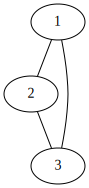

In [14]:
# https://programgenjin.hatenablog.com/entry/2019/02/26/075121

from graphviz import Graph
from graphviz import Digraph

g = Graph(format='png')
dg = Digraph(format='png')

# 無向グラフ
# nodeを追加
g.node('1')
g.node('2')
g.node('3')
# edgeを追加
g.edge('1', '2')
g.edge('2', '3')
g.edge('3', '1')

# 有向グラフ
dg.node('1')
dg.node('2')
dg.node('3')
dg.edge('1', '2')  # 1 -> 2
dg.edge('2', '3')  # 2 -> 3
dg.edge('3', '1')  # 3 -> 1

g


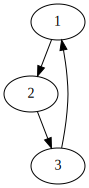

In [15]:
dg

In [18]:
from graphviz import Digraph

dg = Digraph(format='pdf', graph_attr={"page": "2.0,3.0"})


def surface(chunk):
  return "".join([ m.surface for m in chunk.morphs if m.pos != "記号"])

for i,s in enumerate(statements):
  for j,c in enumerate(s):
#    surf = "".join([ m.surface for m in c.morphs if m.pos != "記号"])
    surf = surface(c)
    dst_surf = surface(s[c.dst])
    if c.dst > -1:
      dg.edge(surf, dst_surf)

dg.render('./dgraph', view=False)

'./dgraph.pdf'


### 45. 動詞の格パターンの抽出

In [19]:
doushi_kaku_ptns = []
for i,s in enumerate(statements):
  for j,c in enumerate(s):
    base = ""
    if c.dst == -1:
      continue
    for m in c.morphs:
      if  m.pos == "動詞":
        base = m.base
        break
    if base:
      kakus = set()
      for src in c.srcs:
        for m in reversed(s[src].morphs):
          if m.pos == "助詞":
            kakus.add(m.surface)
            break
      doushi_kaku_ptns.append((base, kakus))
with open("./ch05-45.txt",'wt') as f:
  for k in doushi_kaku_ptns:
    print("{}\t{}".format(k[0], " ".join(sorted(list(k[1])))), file=f)


In [20]:
!sort ch05-45.txt |  uniq -c | sort -r | head -10

     50 する	を
     17 する	に
     17 する	と
     17 する	が
     11 よる	に
     11 する	は を
     10 する	に を
      9 する	で を
      8 行う	を
      8 する	


In [21]:
!sort ch05-45.txt |grep "行う" |  uniq -c | sort -r | head -10

      8 行う	を
      1 行う	まで を
      1 行う	は を をめぐって
      1 行う	に を
      1 行う	に まで を
      1 行う	に により を
      1 行う	に
      1 行う	で を
      1 行う	で に を
      1 行う	て は


In [22]:
!sort ch05-45.txt |grep "^なる" |  uniq -c | sort -r | head -10

      3 なる	に は
      2 なる	に
      2 なる	と
      2 なる	が と
      1 なる	も
      1 なる	は
      1 なる	で は
      1 なる	で に は
      1 なる	て に は
      1 なる	て として に は


In [23]:
!sort ch05-45.txt |grep "与える" |  uniq -c | sort -r | head -10

      2 与える	が に
      1 与える	に は を



### 46. 動詞の格フレーム情報の抽出

In [82]:
doushi_kaku_ptns = []
for i,s in enumerate(statements):
  for j,c in enumerate(s):
    base = ""
    if c.dst == -1:
      continue
    for m in c.morphs:
      if  m.pos == "動詞":
        base = m.base
        break
    if base:
      kakus = {}
      for src in c.srcs:
        for m in reversed(s[src].morphs):
          if m.pos == "助詞":
            frame = ''.join([m.surface for m in s[src].morphs if m.pos != "記号"])
            if m.surface in kakus:
              kakus[m.surface].append(frame)
            else:
              kakus[m.surface] = [frame]
            break
      sorted_kakus = [ {key: kakus[key]} for key in sorted(kakus.keys()) ]
      doushi_kaku_ptns.append( {"base": base, "kaku": sorted_kakus} )
with open("./ch05-46.txt",'wt') as f:
  for i,k in enumerate(doushi_kaku_ptns):
#    kaku = k[kaku]
    kaku = []
    frame = []
    for kk in k["kaku"]:
      kaku += list(kk.keys())
      for v in kk.values():
        frame += v
    print(i,"{}\t{}\t{}".format(k["base"]," ".join(kaku)," ".join(frame)), file=f)


### 47. 機能動詞構文のマイニング

In [123]:
kinou_doushi = []
for i,s in enumerate(statements):
  for j,c in enumerate(s):
    if c.dst == -1:
      continue
    for i,m in enumerate(c.morphs):
      if m.pos == "名詞" and m.pos1 == "サ変接続":
        if i + 1 < len(c.morphs):
          nm = c.morphs[i+1]
          dst_c = s[c.dst]
          dst_m = dst_c.morphs[0]
          if nm.pos == "助詞" and nm.surface == "を" and dst_m.pos == "動詞":
            jutgo = m.surface + nm.surface + dst_m.base
            src_cs = [ s[k] for k in dst_c.srcs ]
            kakus = {}
            for sc in src_cs:
              josh = ""
              text = ""
              for sm in sc.morphs:
                josh = sm.surface if sm.pos == "助詞" else josh
                text += sm.surface
              if josh != "":
                kakus[josh] = text
            sorted_joshs = sorted(list(kakus.keys()))
            sorted_texts = [ kakus[josh] for josh in sorted_joshs ]
            kinou_doushi.append((jutgo, sorted_joshs,sorted_texts))
with open("./ch05-46.txt",'wt') as f:
  for i,k in enumerate(kinou_doushi):
    print("\t".join([k[0]," ".join(k[1]), " ".join(k[2])]), file=f)


### 48. 名詞から根へのパスの抽出

In [146]:
meishi_bunset = []
for i,s in enumerate(statements):
  for j,c in enumerate(s):
    if "名詞" in [ m.pos for m in c.morphs ]:
      meishi_bunset.append( {"chunk":c, "bun":s} )

def get_text(c):
  return ''.join([ m.surface for m in c.morphs])

def get_path(b):
  c = b["chunk"]
  bun = b["bun"]
  s = "->" + get_text(c)
  print("get_path:"+s)
  if c.dst == -1:
    return s
  return get_path(bun[c.dst])

#meishi_bunset
for i,b in enumerate(meishi_bunset):
  # c = b["chunk"]
  # bun = b["bun"]
  print(i, get_path(b))
  # if c.dst == -1:
    # continue
#  print(i, get_text(c), get_text(bun[c.dst]))
  # print(i,b["chunk"])

  


get_path:->人工知能
0 ->人工知能
get_path:->人工知能


TypeError: 'Chunk' object is not subscriptable